# Exploratory Data Analysis

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, glob
from pathlib import Path
import re
import json

import seaborn as sns
from ProjectPackage.util import *
from ProjectPackage.DataProcessing import *

### Plotting ticker changes by sector

In [2]:
data_dict = load_data_sector(
    n_months=6,
    pct_change=True,
    drop_corr_features=True,
    encoding_method=None,
    drop=False,
    year_range=(2008, 2019)
)

In [4]:
len(data_dict)

15

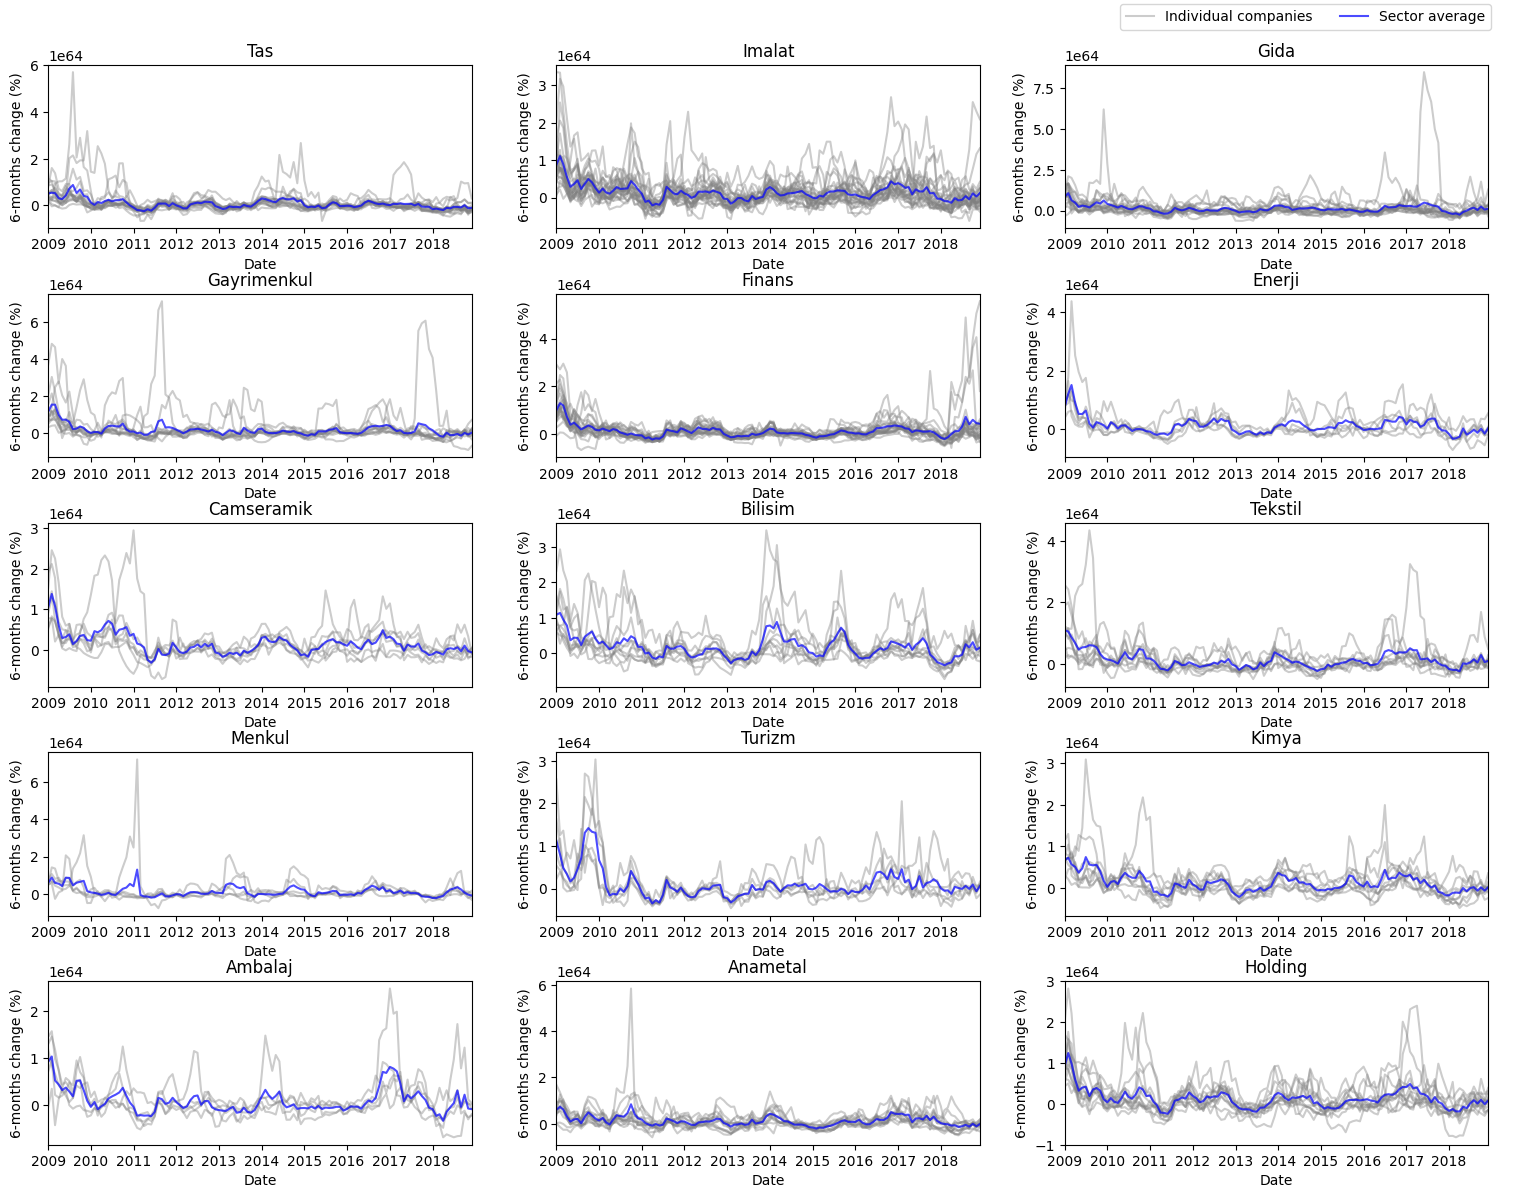

In [37]:
fig, axs = plt.subplots(5, 3, figsize=(16, 12))
axs = axs.flatten()

sector_change_dict = {}

for ax, (sector, data) in zip(axs, data_dict.items()):
    data = data['data']
    tickers = data['ticker'].unique()
    avg_arr = []
    data['marketcap'] *= 100
    
    for ticker in tickers:
        cond = data['ticker'] == ticker
        graph_data = data.loc[cond].sort_values(by='date')
        
        line = ax.plot('date', 'marketcap', data=graph_data, color='gray', alpha=0.4)
        ax.set_title(sector.capitalize())
        ax.set_xlabel('Date')
        ax.set_ylabel('6-months change (%)')
        avg_arr.append(graph_data['marketcap'])
        
    avg_arr = np.array(avg_arr).mean(axis=0)
    sector_change_dict[sector] = avg_arr
    avg_line = ax.plot(graph_data['date'], avg_arr, color='blue', alpha=0.7)
    xmin, xmax = graph_data['date'].min(), graph_data['date'].max()
    ax.set_xlim(xmin, xmax)
    
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.2, hspace=0.4)  
fig.legend(handles=[line[0], avg_line[0]], labels=['Individual companies', 'Sector average'],
           ncols=2, loc=(0.735, 0.975))
    
# ax = axs[-1]
# avg_sector_data = pd.DataFrame(sector_change_dict)
# avg_sector_data['date'] = graph_data.reset_index()['date']
# avg_sector_data.plot(x='date', ax=ax)
# ax.set_xlim(xmin, xmax)
# ax.set_xlabel('Date')
# ax.set_ylabel('6-months change (%)')

# plt.savefig('figures/sector_timeseries.png', dpi=240)

------------

In [39]:
feature, target = load_dataframes()

## Visualizing timeseries to see possible outliers

In [6]:
def plot_timeseries(df, col, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 3))
        
    ax.plot('date', col, data=df, color='darkorange')
    ax.set_title(col.replace('_', ' ').title())
    ax.set_xlabel('Date')
    ax.set_ylabel(col)
    ax.grid()
    
    return ax

In [2]:
file_path = 'processed_data/feature_data.csv'
df = pd.read_csv(file_path, parse_dates=['date'])

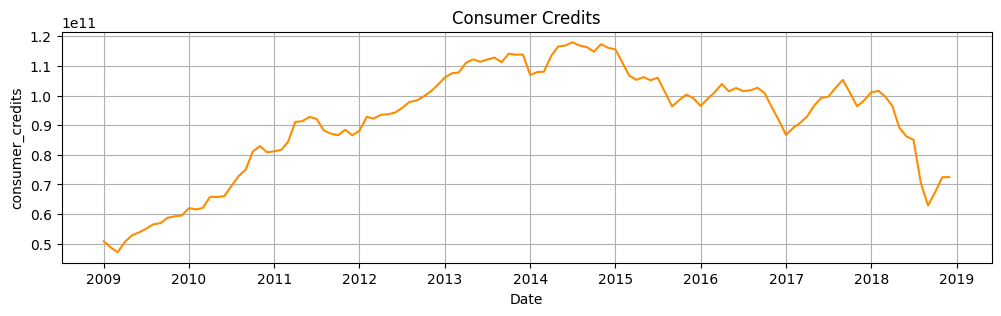

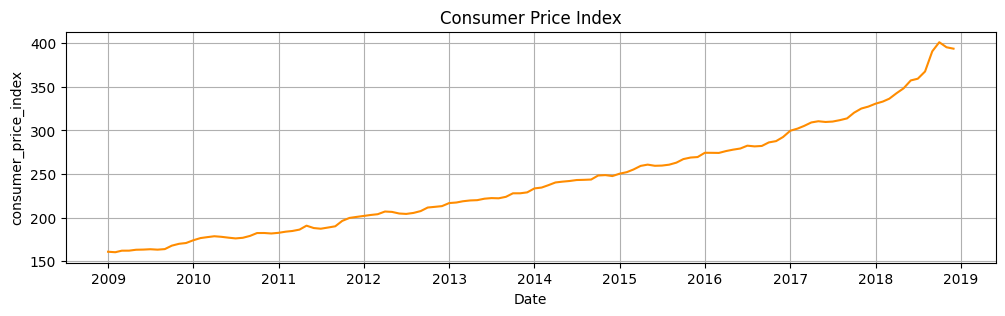

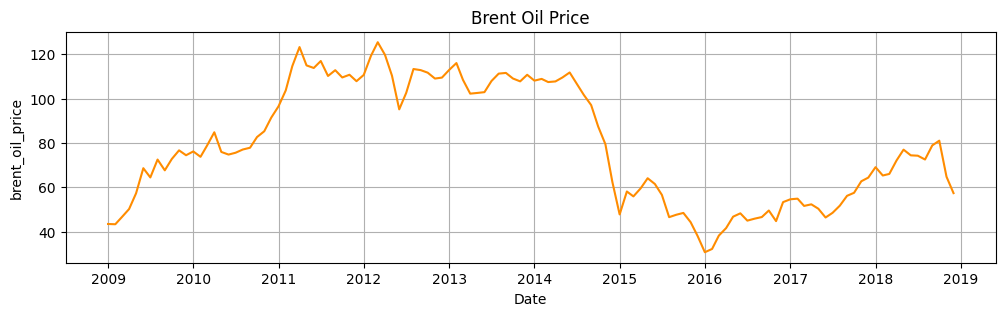

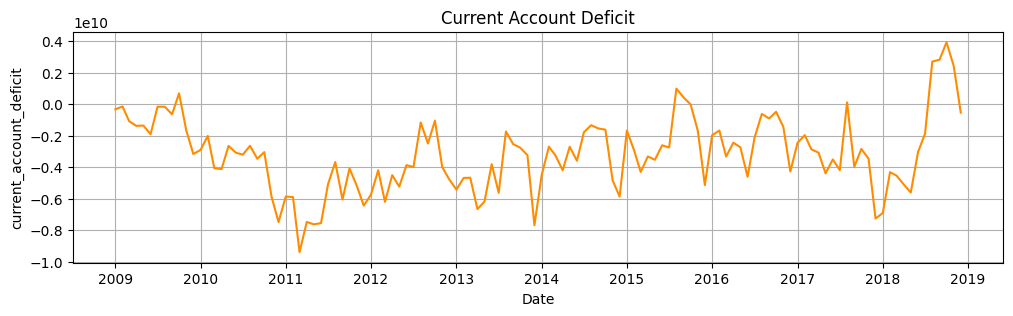

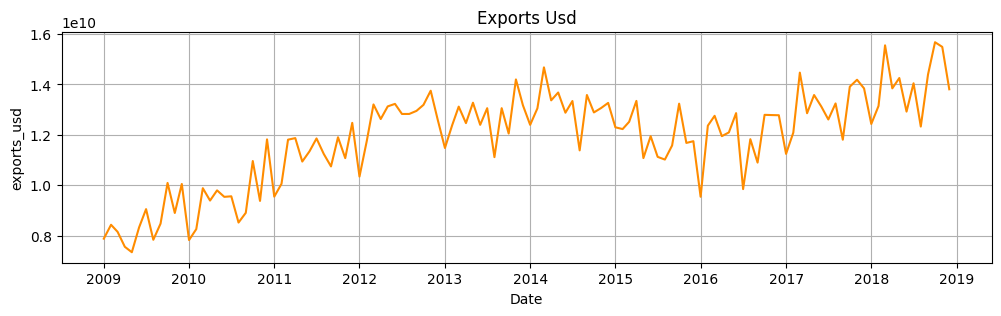

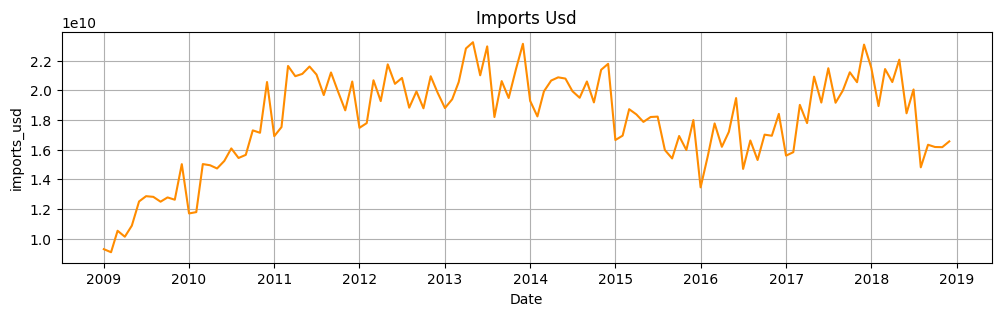

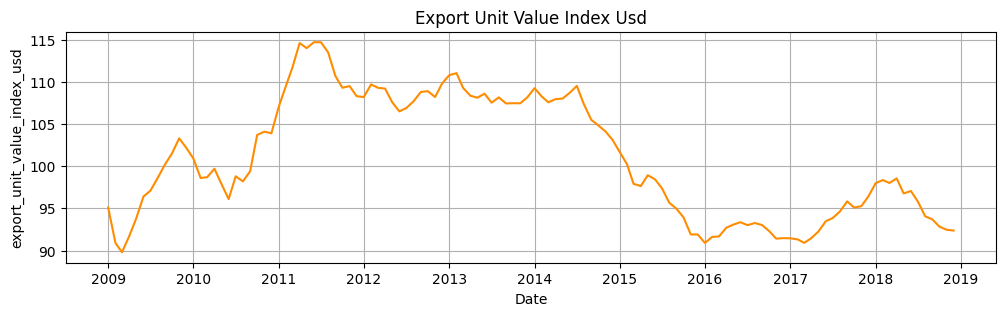

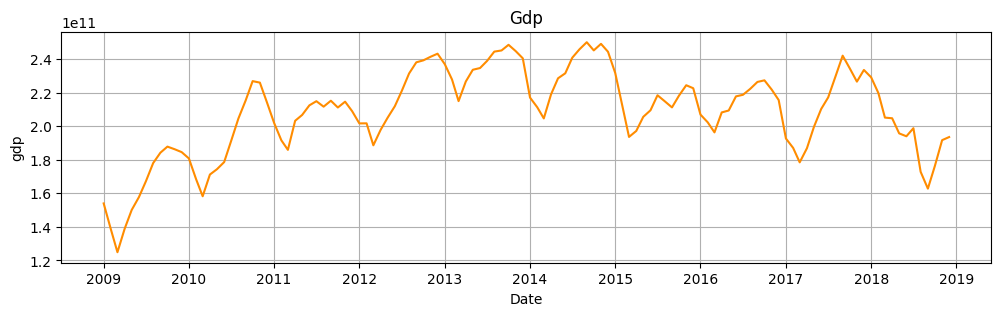

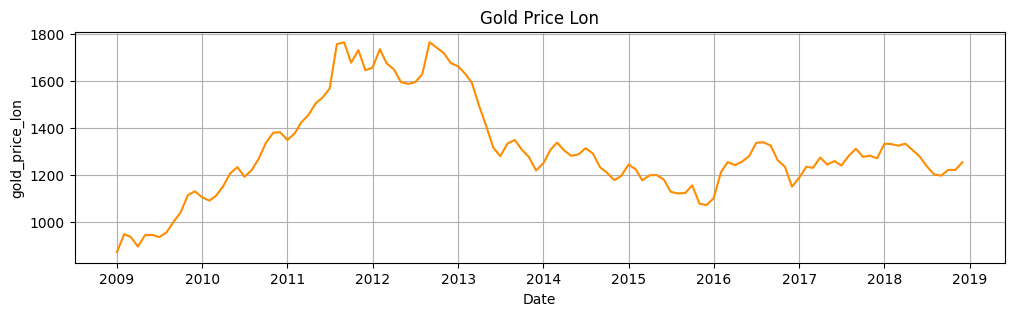

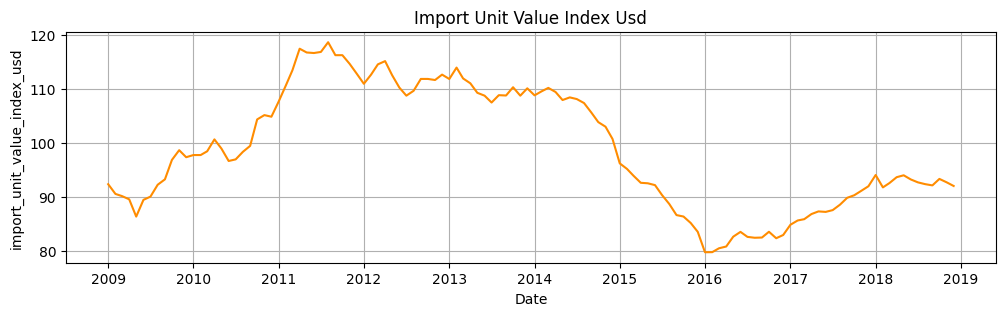

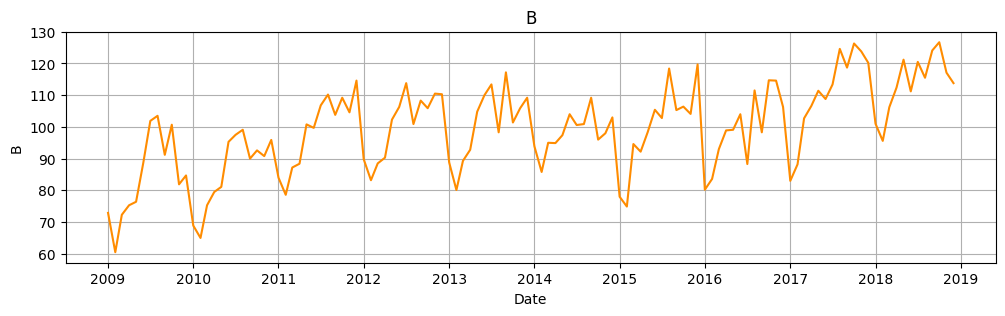

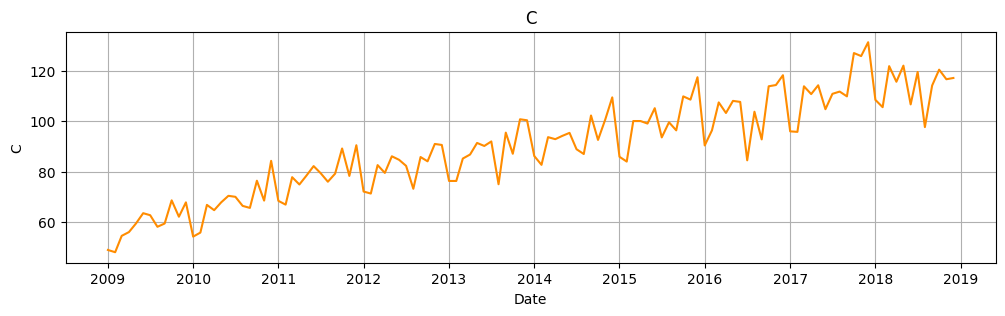

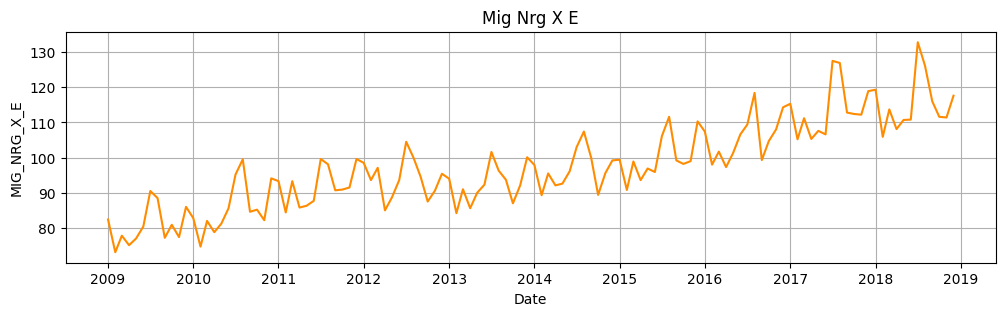

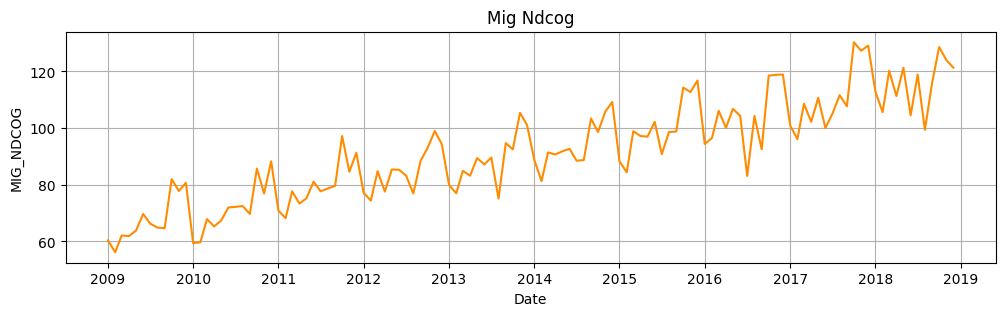

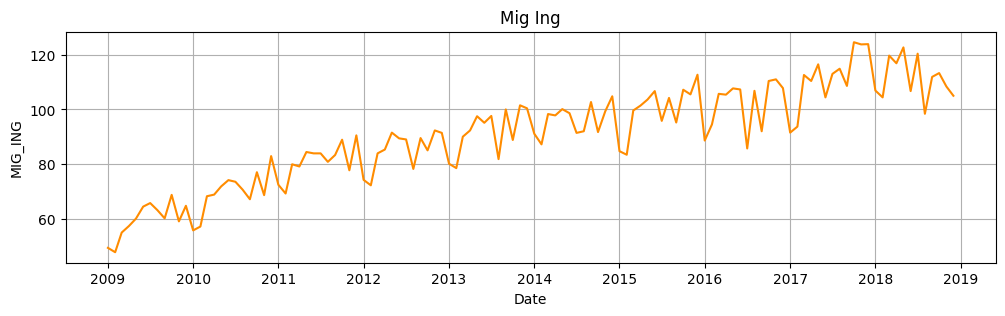

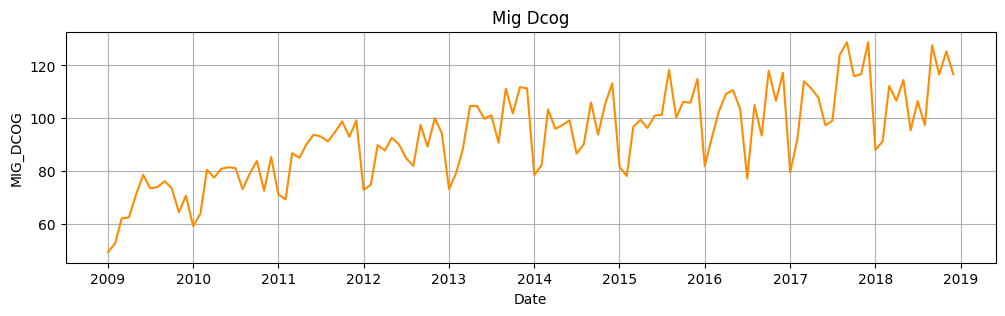

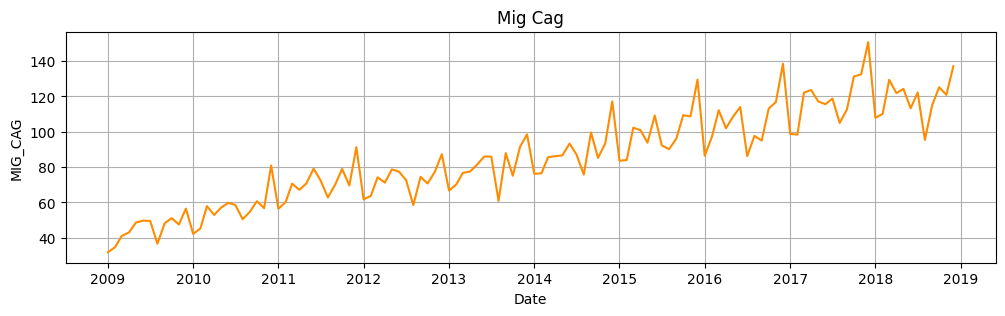

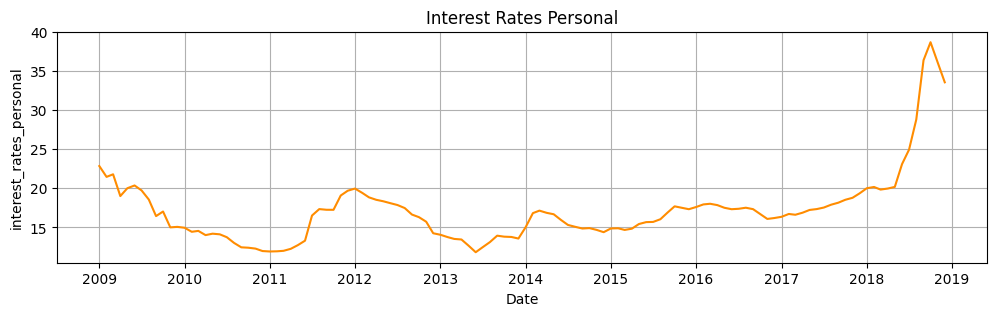

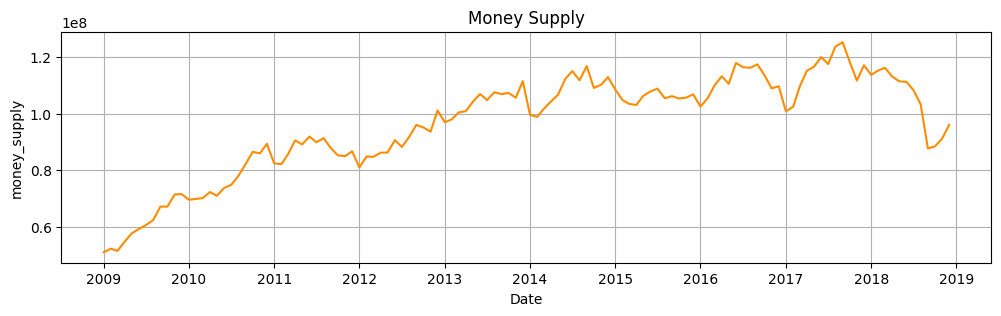

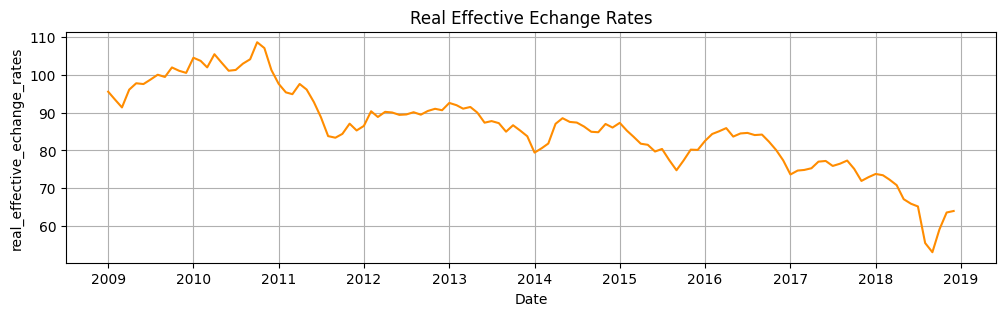

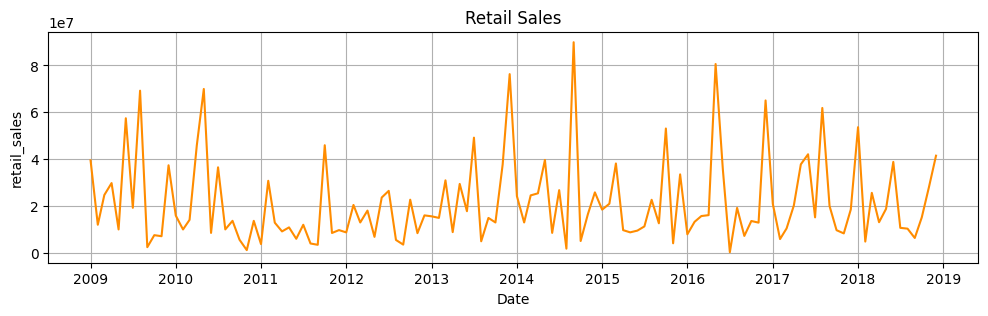

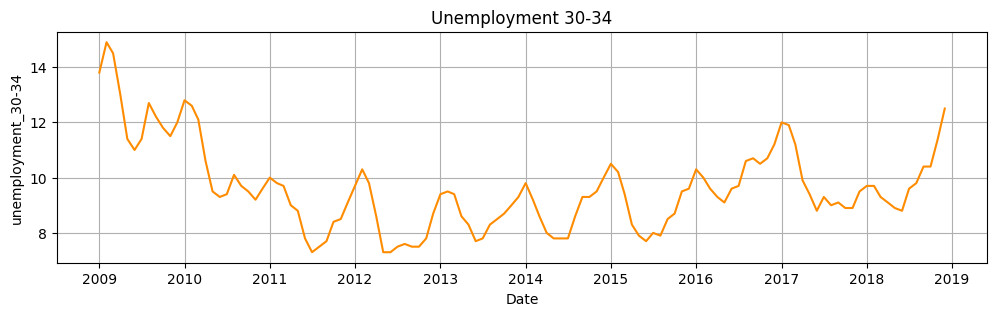

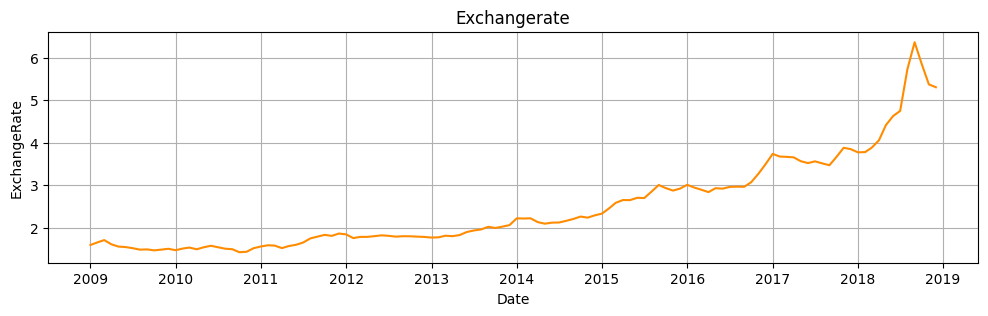

In [7]:
cols = df.columns[3:]

for col in cols:
    plot_timeseries(df, col)
    plt.show()

## Correlation matrix

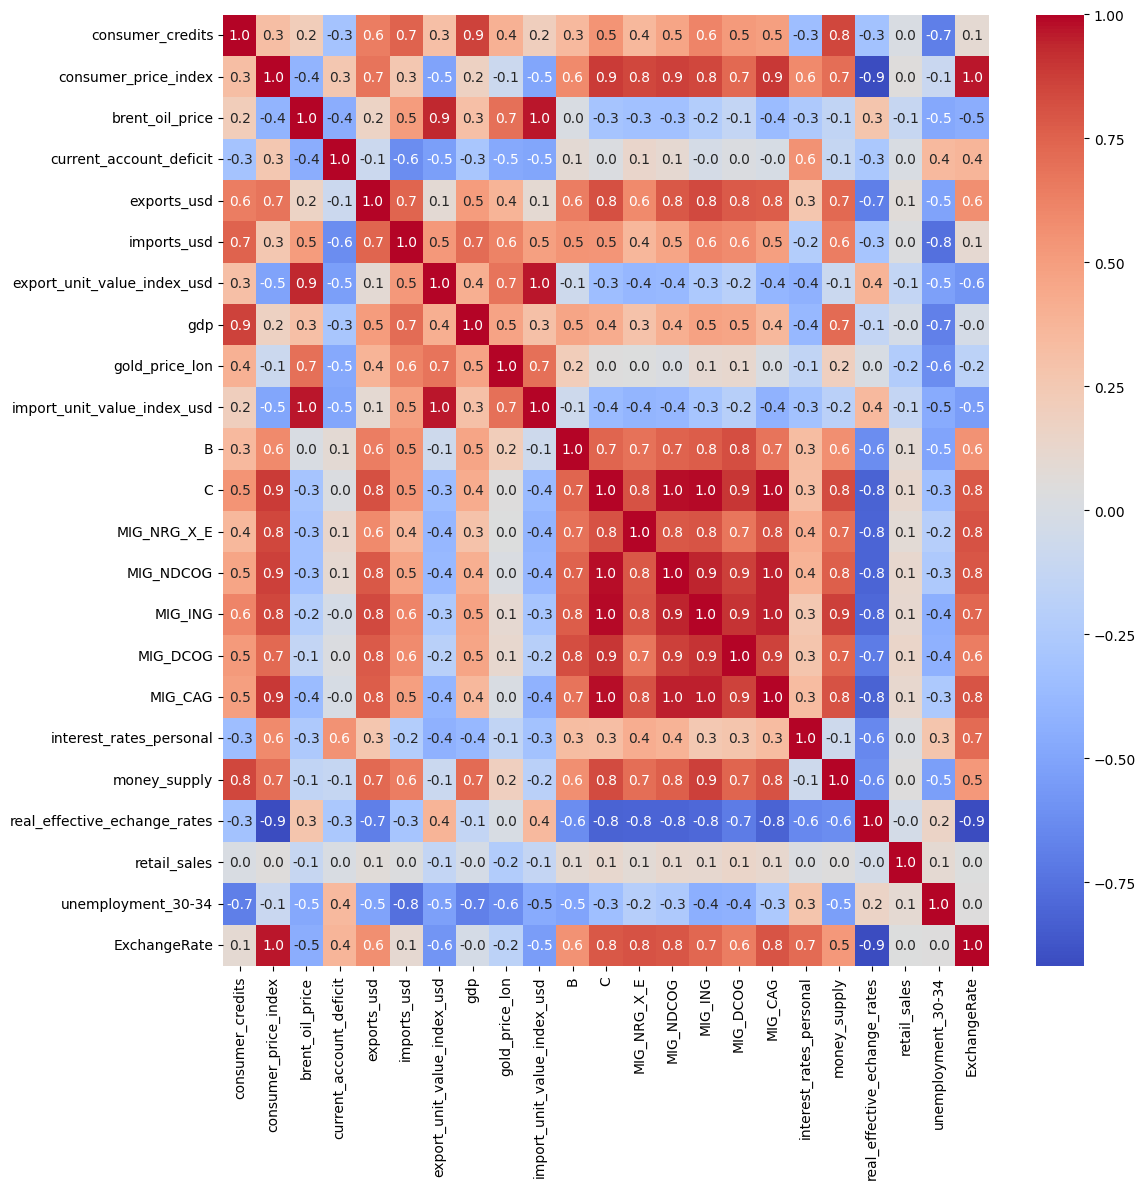

In [42]:
plt.figure(figsize=(12, 12), tight_layout=True)
sns.heatmap(df.iloc[:, 3:].corr(), cmap='coolwarm', annot=True, fmt='.1f')
plt.savefig('figures/feature_corr_matrix.pdf')
plt.show()

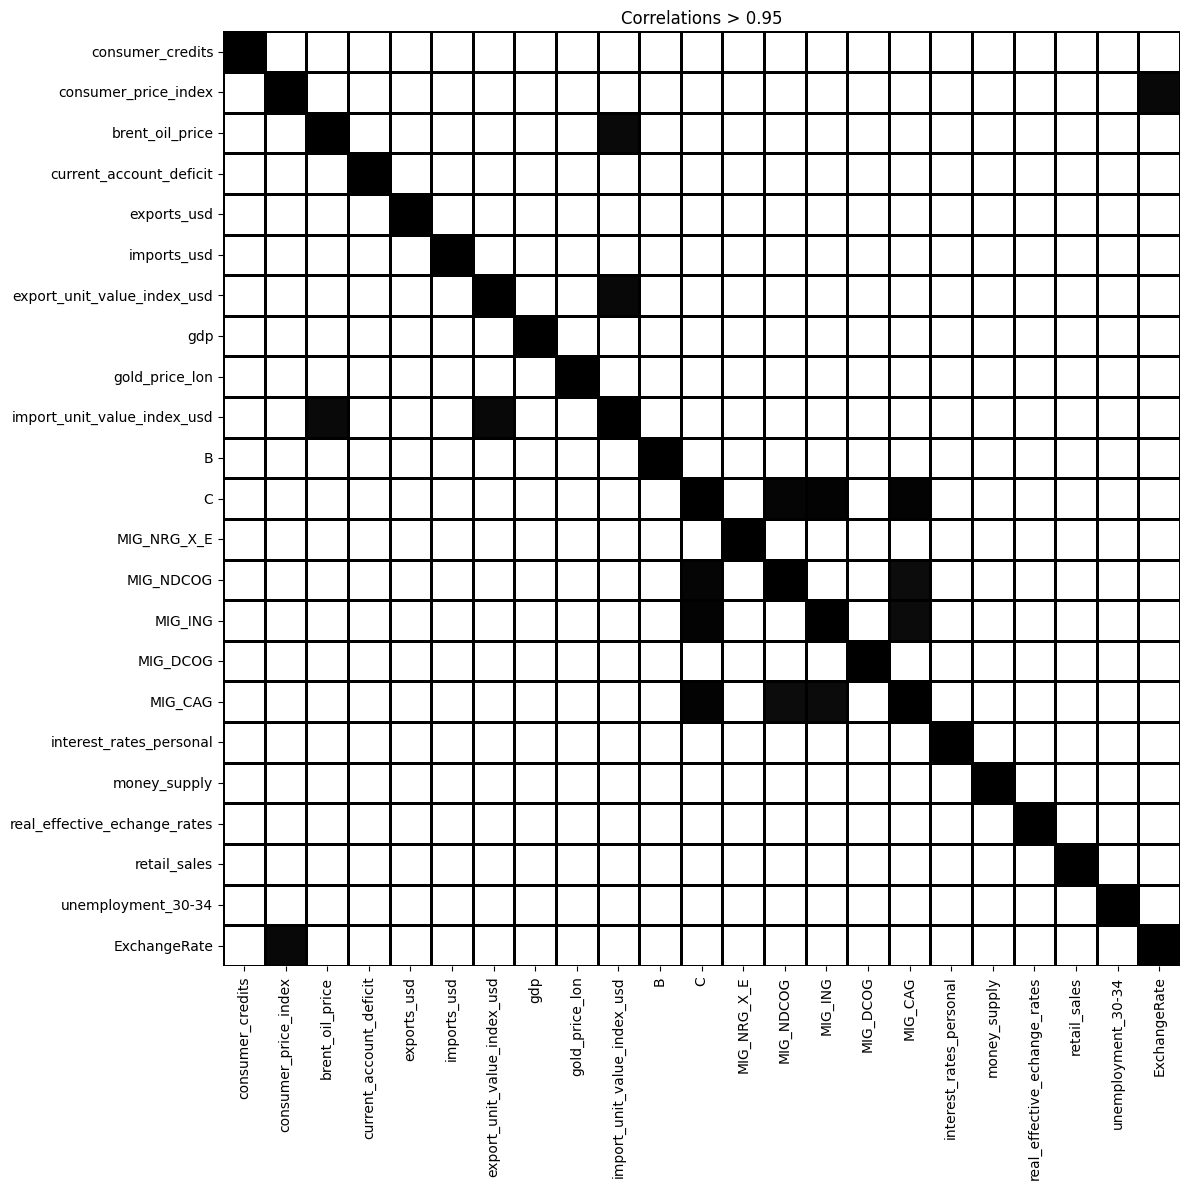

In [44]:
corr_matrix = df.iloc[:, 3:].corr()

cond_pos = (corr_matrix > 0.95)
cond_neg = (corr_matrix < -0.95)

corr_matrix = corr_matrix[cond_pos].fillna(0)

plt.figure(figsize=(12, 12), tight_layout=True)
sns.heatmap(corr_matrix, cmap='binary', linewidths=1, linecolor='black', cbar=False)
plt.title('Correlations > 0.95')
plt.savefig('figures/feature_positive_corr_matrix.pdf')
plt.show()

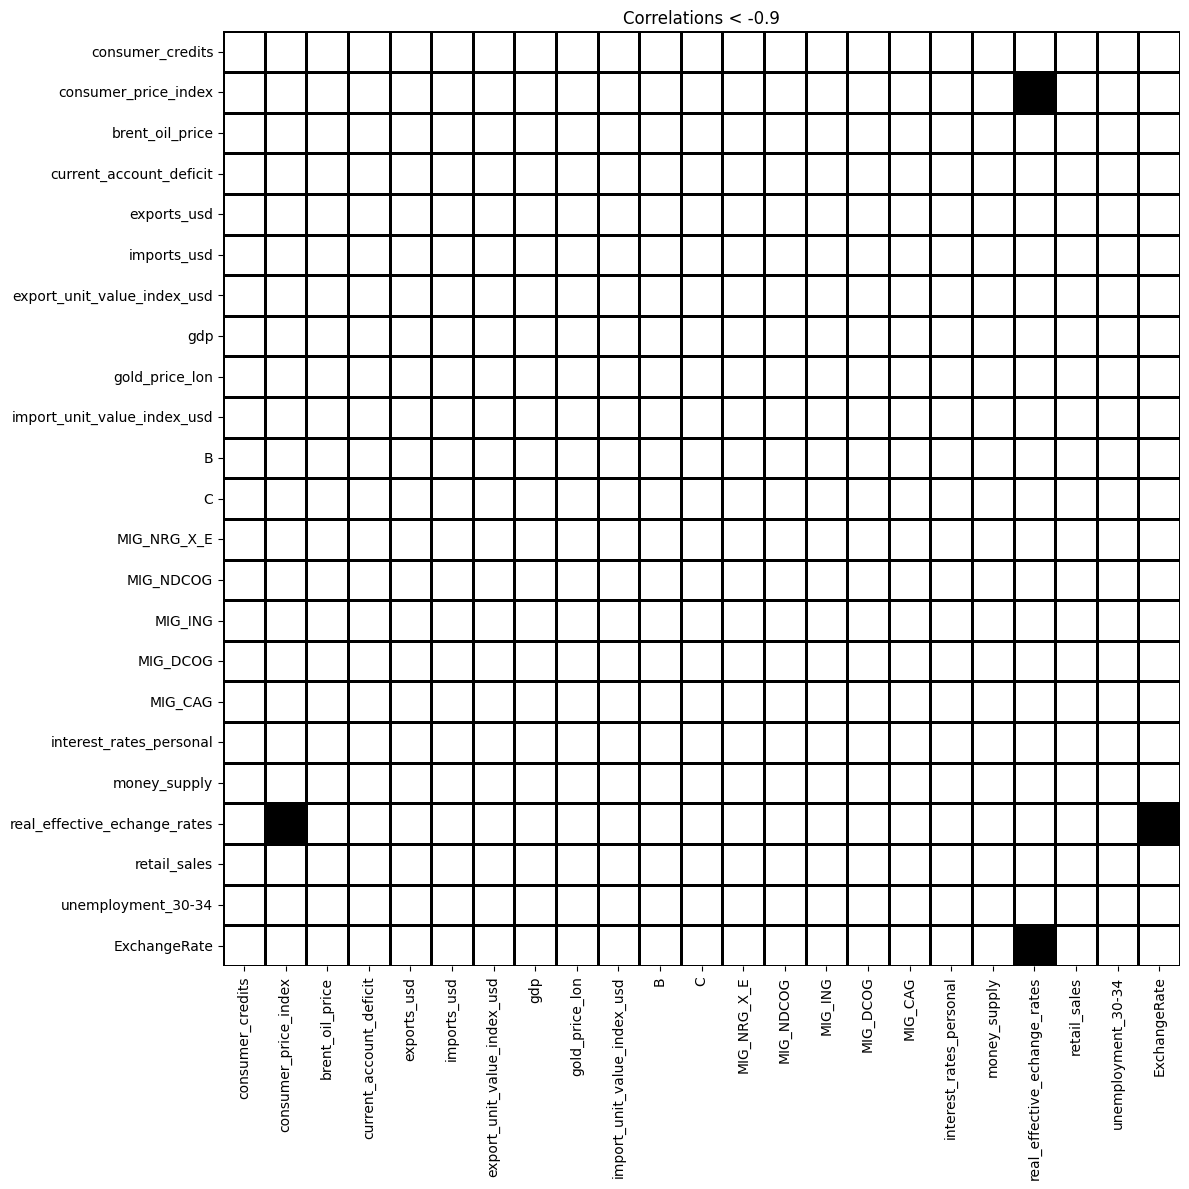

In [43]:
corr_matrix = df.iloc[:, 3:].corr()

cond_pos = (corr_matrix > 0.95)
cond_neg = (corr_matrix < -0.9)

corr_matrix = corr_matrix[cond_neg].fillna(0) * -1

plt.figure(figsize=(12, 12), tight_layout=True)
sns.heatmap(corr_matrix, cmap='binary', linewidths=1, linecolor='black', cbar=False)
plt.title('Correlations < -0.9')
plt.savefig('figures/feature_negative_corr_matrix.pdf')
plt.show()

Dropping the highly correlated features

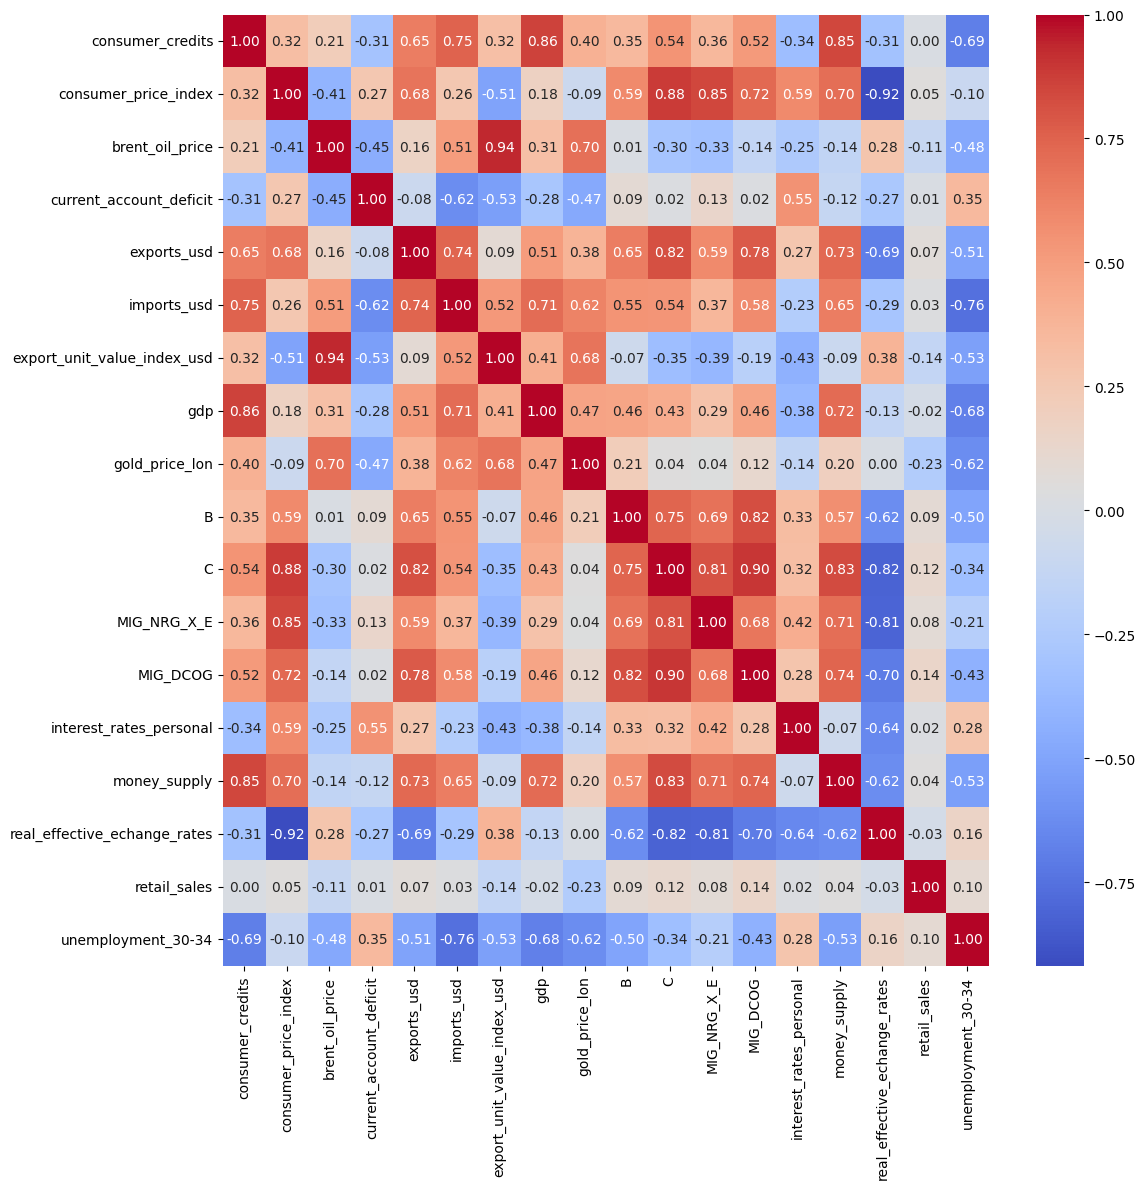

In [53]:
cols_to_drop = ['MIG_CAG', 'MIG_ING', 'MIG_NDCOG', 'ExchangeRate', 'import_unit_value_index_usd']

df1 = df.drop(columns=cols_to_drop)
plt.figure(figsize=(12, 12), tight_layout=True)
sns.heatmap(df1.iloc[:, 3:].corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

### Variable distributions

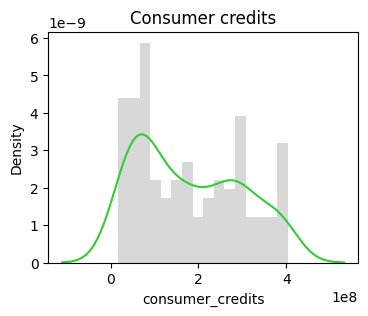

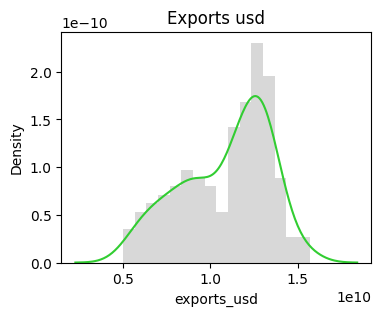

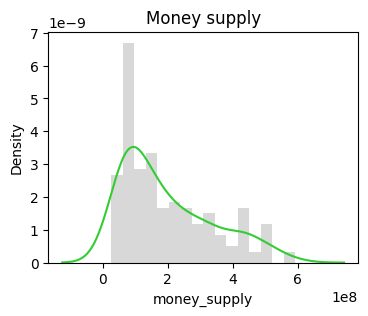

In [50]:
variables = ['consumer_credits', 'exports_usd', 'money_supply']
for variable in variables:
    fig, ax = plt.subplots(figsize=(4, 3))
    data = df[variable]
    sns.kdeplot(data, color='limegreen', ax=ax)
    ax.hist(data, density=True, bins=16, color='gray', alpha=0.3)
    ax.set_title(variable.replace('_', ' ').capitalize())
    plt.show()